# **Imports**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import h5py

nltk.download('omw-1.4')
import string
!pip install pyspellchecker
!pip install langdetect
from spellchecker import SpellChecker
from langdetect import detect
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score
!pip install pyenchant
#import enchant
!pip install rake-nltk
from sklearn.decomposition import LatentDirichletAllocation
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
!pip install transformers
!pip install sentencepiece

from transformers import MarianMTModel, MarianTokenizer

import torch
!pip install transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import CoherenceModel

from transformers import XLNetTokenizer, XLNetForSequenceClassification
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import SimpleRNN,Bidirectional
from transformers import MarianMTModel, MarianTokenizer
import pickle


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=c63e55a5b77bc00103e913af77e214ff32787d4988a7e3d850e97415a665fe85
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 3.7 MB/s eta 0:00:00


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/electronics_sample.csv')
df

,overall,vote,reviewTime,reviewText,summary
0,2,0,2010-02-10,Tech support is the worst,1265760000
1,2,0,2016-10-24,Screws were missing from the bracket and beaut...,Spend a little more and get much better.
2,1,0,2017-07-10,Trouble connecting and staying connected via b...,1499644800
3,4,5,2013-05-02,I purchased this unit for our RV to replace an...,Receiver Offers a Lot of Flexibility & Complexity
4,3,0,2013-01-04,It works. Nuff said but the review requires 1...,It's a cable
...,...,...,...,...,...
19804,3,0,2014-11-11,rendering lens useless in darkness,1415664000
19805,1,0,2015-03-14,One Star,1426291200
19806,4,0,2009-03-27,Decent Cable for the Money,1238112000
19807,3,2,2014-06-06,OK drop protection for reasonable price.,1402012800


In [ ]:
new_df = df[['overall', 'reviewText']].copy()
new_df = new_df.loc[new_df['overall'] != 3]
new_df

,overall,reviewText
0,2,Tech support is the worst
1,2,Screws were missing from the bracket and beaut...
2,1,Trouble connecting and staying connected via b...
3,4,I purchased this unit for our RV to replace an...
5,1,I bought this and a viper alarm for my civic a...
...,...,...
19801,5,Having just finished wall mounting four speake...
19803,5,Cmara digital
19805,1,One Star
19806,4,Decent Cable for the Money


In [ ]:
new_df['overall'] = new_df['overall'].apply(lambda x: 1 if x <= 2 else 0)
new_df

,overall,reviewText
0,1,Tech support is the worst
1,1,Screws were missing from the bracket and beaut...
2,1,Trouble connecting and staying connected via b...
3,0,I purchased this unit for our RV to replace an...
5,1,I bought this and a viper alarm for my civic a...
...,...,...
19801,0,Having just finished wall mounting four speake...
19803,0,Cmara digital
19805,1,One Star
19806,0,Decent Cable for the Money


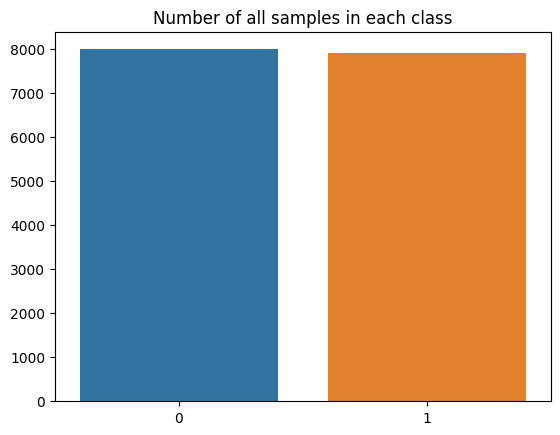

0    7988
1    7899
Name: overall, dtype: int64


In [ ]:
class_counts = new_df['overall'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Number of all samples in each class')
plt.show()
print(class_counts)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/amazon_reviews.csv')
df2

,userName,verified,itemName,description,image,brand,feature,category,price,rating,reviewTime,summary,reviewText,vote
0,Amazon Customer,True,"Toblerone Swiss Milk Chocolate Bar, Crunchy Sa...","[""Made from deliciously decadent ingredients, ...",['https://images-na.ssl-images-amazon.com/imag...,Toblerone,[],Prime_Pantry,$1.63,5.0,2018-01-01,Five Stars,super smooth and yummy with crunchy bits,0
1,Carla,True,"Prince of Peace Organic Tea, Oolong, 100 Tea Bags","['Prince of Peace Enterprises, Inc., founded i...",['https://images-na.ssl-images-amazon.com/imag...,Prince Of Peace,[],Grocery_and_Gourmet_Food,$6.40,5.0,2018-01-01,Five Stars,Perfect for kombucha,0
2,Jaclyn,True,"Pet Champion Adjustable No-Pull Harness, Colla...","[""The Pet Champion Large/ Extra Large 22-36 in...",['https://images-na.ssl-images-amazon.com/imag...,Pet Champion,"['Features Bright Pink Lemonade pattern', 'Dua...",Pet_Supplies,$7.99,5.0,2018-01-01,she has an odd shape chest and her pull over h...,Finally a harness that fits my puppy. I really...,0
3,Christinne M,False,Koh-I-Noor Progresso Woodless Colored 24-Penci...,['Koh-I-Noor Progresso Woodless Colored 24-Pen...,['https://images-na.ssl-images-amazon.com/imag...,KOH-I-NOOR,"['Rich, pigmented, solid color encased in lacq...",Arts_Crafts_and_Sewing,$14.18,5.0,2018-01-01,Loving!!,I LOVE THEM!! I bought them at Micheals our of...,0
4,Sandy,True,"Parker Urban Premium Ebony Metal Chiseled, Bal...","[""Stunning craftsmanship based on a classic st...",['https://images-na.ssl-images-amazon.com/imag...,Parker,['Ebony black with metallic highlights and a g...,Office_Products,NaN,5.0,2018-01-01,I love this pen,"I love this pen! I love the shape of it, the f...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551154,Greg,True,Pandahall 10m(32.80 feet) Platinum Color Iron ...,"['Iron Twist Chains, Platinum Color<P>Size: Ri...",['https://images-na.ssl-images-amazon.com/imag...,PH PandaHall,"['Iron Twist Chains, Platinum Color, Ring: abo...",Arts_Crafts_and_Sewing,$8.29,2.0,2018-10-03,Two Stars,Cheap price but weak chain.,0
551155,Gayle LaRue,True,Keter Westwood Plastic Deck Storage Container ...,"['Plenty of storage and comfortable seating, a...",['https://images-na.ssl-images-amazon.com/imag...,Keter,['Outside Dimensions: 61 in. L x 28.5 in. W x ...,Patio_Lawn_and_Garden,$121.76,4.0,2018-10-03,Deck box good investment,Great deck box,0
551156,Alfred D. Wallace,True,AcuRite 06052M Remote Battery Pack for 5-in-1 ...,"[""The AcuRite remote battery pack plugs into t...",['https://images-na.ssl-images-amazon.com/imag...,AcuRite,['Makes battery replacement easy for AcuRite 5...,Patio_Lawn_and_Garden,$19.95,5.0,2018-10-03,This will keep the old man off the roof!,Putting these in my weather station. I anticip...,0
551157,Dave Dunn Wilmer,True,Keter Unity XL Indoor Outdoor Entertainment BB...,['The extra-large outdoor entertainment statio...,['https://images-na.ssl-images-amazon.com/imag...,Keter,['Dimensions: 53.1 in. L x 20.4 in. W x 35.4 i...,Patio_Lawn_and_Garden,$155.64,5.0,2018-10-03,EASY TO ASSEMBLE AND WORKS WELL NEXT TO GRILL,This is a nice quality grilling table where yo...,0


In [ ]:
# Filter the DataFrame to keep only the rows with the specific category
new_df2 = df2[df2['category'].isin(['Cell_Phones_and_Accessories', 'Video_Games'])]

# Reset the index of the DataFrame
new_df2.reset_index(drop=True, inplace=True)

In [ ]:
new_df2

,userName,verified,itemName,description,image,brand,feature,category,price,rating,reviewTime,summary,reviewText,vote
0,Daniel,True,Cimo Slim Flexible TPU Cimo Shock Absorbing Ca...,[],['https://images-na.ssl-images-amazon.com/imag...,Cimo,"['Made of shock absorbing, shatterproof premiu...",Cell_Phones_and_Accessories,$7.98,5.0,2018-01-01,Slim and elegant,Slim and neat. The phone is protected an looks...,0
1,Dariela,True,Razer DeathAdder Expert - Optical Esports Ergo...,"['', 'Since its first inception, the Razer Dea...",['https://images-na.ssl-images-amazon.com/imag...,Razer,['The Razer DeathAdder continues to offer game...,Video_Games,$2.54,5.0,2018-01-01,Great mouse,I've had since 2015 and this cutie is still wo...,0
2,Cookies,True,"iPhone 8 Plus, 7 Plus, 6S Plus, 6 Plus Screen ...",[],['https://images-na.ssl-images-amazon.com/imag...,amFilm,"['Specifically designed for iPhone 8 Plus, 7 P...",Cell_Phones_and_Accessories,$7.99,5.0,2018-01-01,Five Stars,Gifted - loved and has protected the phone,0
3,Chief,False,"Anker 15W Dual USB Solar Charger, PowerPort So...",['Note: Use screwdriver to tighten the screw p...,['https://images-na.ssl-images-amazon.com/imag...,Anker,['The Anker Advantage: Join the 10 million+ po...,Cell_Phones_and_Accessories,$39.99,4.0,2018-01-01,Solid solid calharger,So far this little dual solar panel works! Its...,0
4,Momma,True,"Tekcoo Galaxy S5 Case, [Tmajor] Sturdy [Hot Pi...",['Features:<br> <br> -100% Brand New and good ...,['https://images-na.ssl-images-amazon.com/imag...,Tekcoo,['Tekcoo Dual Layer Armor Rugged Samsung Galax...,Cell_Phones_and_Accessories,$7.85,2.0,2018-01-01,The loose rubbery edges near the top and botto...,The loose rubbery edges near the top and botto...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54652,Speed E Byer,True,Watch Dogs 2 - Xbox One,"[""Explore the birthplace of the tech revolutio...",['https://images-na.ssl-images-amazon.com/imag...,by\n \n Ubisoft,['Explore a massive and dynamic open world - E...,Video_Games,\n\t\t ...,4.0,2018-10-01,Four Stars,intense have to get use to the play action,0
54653,D. Lyons,True,Kartice for Fitbit Blaze Charger Charging Stan...,[],['https://images-na.ssl-images-amazon.com/imag...,Kartice,"['Specially designed for 2016 Fitbit Blaze,mor...",Cell_Phones_and_Accessories,$8.99,5.0,2018-10-01,Five Stars,perfect and easy works great,0
54654,gragsinc,True,Kartice for Fitbit Blaze Charger Charging Stan...,[],['https://images-na.ssl-images-amazon.com/imag...,Kartice,"['Specially designed for 2016 Fitbit Blaze,mor...",Cell_Phones_and_Accessories,$8.99,5.0,2018-10-02,Works Amazingly!,So much better than the stock charger that cam...,0
54655,angel b,True,"RAMPOW Micro USB Cables Braided, Charging Cabl...",[],['https://images-na.ssl-images-amazon.com/imag...,RAMPOW,['FAST CHARGE & SYNC - RAMPOW Micro-USB cable ...,Cell_Phones_and_Accessories,$8.49,1.0,2018-10-02,Junk,Junk,0


In [ ]:
new_df2 = new_df2[['rating', 'reviewText']].copy()
new_df2 = new_df2.loc[new_df2['rating'] != 3]
new_df2

,rating,reviewText
0,5.0,Slim and neat. The phone is protected an looks...
1,5.0,I've had since 2015 and this cutie is still wo...
2,5.0,Gifted - loved and has protected the phone
3,4.0,So far this little dual solar panel works! Its...
4,2.0,The loose rubbery edges near the top and botto...
...,...,...
54652,4.0,intense have to get use to the play action
54653,5.0,perfect and easy works great
54654,5.0,So much better than the stock charger that cam...
54655,1.0,Junk


In [ ]:
new_df2['rating'] = new_df2['rating'].apply(lambda x: 1 if x <= 2 else 0)
new_df2

,rating,reviewText
0,0,Slim and neat. The phone is protected an looks...
1,0,I've had since 2015 and this cutie is still wo...
2,0,Gifted - loved and has protected the phone
3,0,So far this little dual solar panel works! Its...
4,1,The loose rubbery edges near the top and botto...
...,...,...
54652,0,intense have to get use to the play action
54653,0,perfect and easy works great
54654,0,So much better than the stock charger that cam...
54655,1,Junk


In [ ]:
combined_df = pd.concat([new_df, new_df2], ignore_index=True)
# Assign 'rating' values to 'overall' where 'overall' is missing
combined_df['overall'].fillna(combined_df['rating'], inplace=True)

# Drop the 'rating' column if desired
combined_df.drop('rating', axis=1, inplace=True)
combined_df

,overall,reviewText
0,1.0,Tech support is the worst
1,1.0,Screws were missing from the bracket and beaut...
2,1.0,Trouble connecting and staying connected via b...
3,0.0,I purchased this unit for our RV to replace an...
4,1.0,I bought this and a viper alarm for my civic a...
...,...,...
66236,0.0,intense have to get use to the play action
66237,0.0,perfect and easy works great
66238,0.0,So much better than the stock charger that cam...
66239,1.0,Junk


# **Preprocessing**

In [ ]:
class TextPreprocessor:
  def __init__(self):

    self.emoji_dict = {"😊": "positive", "😢": "negative", "😠": "negative", "😡": "negative", "😃": "positive",
                  "❤️": "positive", "😍": "positive", "😎": "positive", "😔": "negative", "😒": "negative",
                  "😞": "negative", "😖": "negative", "😘": "positive", "😜": "positive", "😝": "positive",
                  "😤": "negative", "😮": "neutral", "😯": "neutral", "😪": "negative", "😫": "negative",
                  "😴": "neutral", "😌": "neutral", "😛": "positive", "😚": "positive", "😙": "positive",
                  "😗": "positive", "😘": "positive", "😉": "positive", "😊": "positive"}



  def remove_non_english_words(self,text_list):
    english_text = []
    for text in text_list:
        text = re.sub(r'[^a-zA-Z\s]+', '', text)

        english_text.append(text)
    return english_text



  def clean_tokens(self,tokens):
        # remove URLs
        tokens = [re.sub(r'http\S+', '', token) for token in tokens]

        # remove numbers
        tokens = [re.sub(r'\d+', '', token) for token in tokens]

        # remove special characters
        tokens = [re.sub(r'[^\w\s]', '', token) for token in tokens]

        return tokens


  def unique_tokens(self,tokens):
        return list(set(tokens))

  def handle_negations(self,tokens):
        return ["not" + token if token in ['not', 'never', 'no', 'nothing', 'neither', 'nor'] else token for token in tokens]


  def handle_emojis(self,text):
      cleaned_text = []
      for word in text:
          if word in self.emoji_dict:
              sentiment = self.emoji_dict[word]
              cleaned_text.append(sentiment)
          else:
              cleaned_text.append(word)
      return cleaned_text


  def preprocessing(self,text):
      #tonkenize
      tokens = nltk.word_tokenize(text)
      # Removing non-English words
      tokens=self.remove_non_english_words(tokens)
      #stop words
      stop_words = set(nltk.corpus.stopwords.words('english'))
      tokens = [token for token in tokens if token.lower() not in stop_words]

      #stemming
      #stemmer = SnowballStemmer('english')
      #tokens = [stemmer.stem(token) for token in tokens]
      # emojis
      tokens=self.handle_emojis(tokens)
      # Removing punctuation
      tokens = [token for token in tokens if token not in string.punctuation]

      tokens=self.clean_tokens(tokens)

      # handle negations
      tokens=self.handle_negations(tokens)

      lemmatizer = WordNetLemmatizer()
      tokens = [lemmatizer.lemmatize(token) for token in tokens]
      # remove duplicates
      #tokens = self.unique_tokens(tokens)

      return tokens


In [ ]:
preprocessor = TextPreprocessor()

def preprocess_review(text):
    if pd.notnull(text):  # Check for missing values
        preprocessed_tokens = preprocessor.preprocessing(text)
        return ' '.join(preprocessed_tokens)  # Join the tokens into a single sentence
    else:
        return ''

combined_df['preprocessed_review'] = combined_df['reviewText'].apply(preprocess_review)


In [ ]:
combined_df

,overall,reviewText,preprocessed_review
0,1.0,Tech support is the worst,Tech support worst
1,1.0,Screws were missing from the bracket and beaut...,Screws missing bracket beauty dish within week...
2,1.0,Trouble connecting and staying connected via b...,Trouble connecting staying connected via bluet...
3,0.0,I purchased this unit for our RV to replace an...,purchased unit RV replace older AMFMCassette T...
4,1.0,I bought this and a viper alarm for my civic a...,bought viper alarm civic took shop get install...
...,...,...,...
66236,0.0,intense have to get use to the play action,intense get use play action
66237,0.0,perfect and easy works great,perfect easy work great
66238,0.0,So much better than the stock charger that cam...,much better stock charger came fitbit
66239,1.0,Junk,Junk


In [ ]:
combined_df.to_csv('combined_df', index=False)


# **Loading preprocessed data**

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/final_df')
#df

# **Word Embeddings**

In [ ]:
vectorizer = CountVectorizer(max_features=10000, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(combined_df['preprocessed_review'])
feature_names = np.array(vectorizer.get_feature_names_out())


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA to extract topics
num_topics = 2000
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
topic_matrix = lda.fit_transform(doc_term_matrix)


In [ ]:
# Get the topic-word distributions
topic_word_matrix = lda.components_

# Examine the resulting topics
topics = []
for topic_idx, topic in enumerate(topic_word_matrix):
    top_words_indices = topic.argsort()[:-10 - 1:-1]  # Get indices of top 10 words
    top_words = [feature_names[idx] for idx in top_words_indices]
    topics.append(top_words)

# Get the dominant topic for each review
dominant_topic = np.argmax(topic_matrix, axis=1)

# Add the dominant topic column to your DataFrame
combined_df['dominant_topic'] = dominant_topic

# Define a function to map topic indices to topic names
def get_topic_name(topic_words):
    return ', '.join(topic_words[:1])  # Adjust the number of top words as needed

# Map the topic indices to topic names
combined_df['topic_name'] = combined_df['dominant_topic'].apply(lambda x: get_topic_name(topics[x]))



In [ ]:
combined_df

,overall,reviewText,preprocessed_review,dominant_topic,topic_name
0,1.0,Tech support is the worst,Tech support worst,1007,support
1,1.0,Screws were missing from the bracket and beaut...,Screws missing bracket beauty dish within week...,53,stretch
2,1.0,Trouble connecting and staying connected via b...,Trouble connecting staying connected via bluet...,1948,bluetooth
3,0.0,I purchased this unit for our RV to replace an...,purchased unit RV replace older AMFMCassette T...,432,unit
4,1.0,I bought this and a viper alarm for my civic a...,bought viper alarm civic took shop get install...,92,shop
...,...,...,...,...,...
66236,0.0,intense have to get use to the play action,intense get use play action,1384,st
66237,0.0,perfect and easy works great,perfect easy work great,1506,easy
66238,0.0,So much better than the stock charger that cam...,much better stock charger came fitbit,1380,fitbit
66239,1.0,Junk,Junk,872,expensive


In [ ]:
# Preprocess the new review text
review='The buttons and gestures allow for efficient navigation and productivity '
preprocessed_review = preprocessor.preprocessing(review)  # Replace with your actual preprocessing code

# Transform the preprocessed review text into a document-term matrix
new_review_matrix = vectorizer.transform([' '.join(preprocessed_review)])  # Join the preprocessed tokens into a single string

# Apply the trained LDA model to the new review matrix
new_review_topic_dist = lda.transform(new_review_matrix)

# Find the dominant topic for the new review
dominant_topic_index = np.argmax(new_review_topic_dist)
dominant_topic_name = get_topic_name(topics[dominant_topic_index])

# Print the dominant topic and its name
print(f"Dominant Topic Name: {dominant_topic_name}")


Dominant Topic Name: button


In [ ]:
# Save the trained LDA model
with open('lda.pkl', 'wb') as file:
    pickle.dump(lda, file)

# Save the CountVectorizer
with open('count_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

# Save the topics
with open('topics.pkl', 'wb') as file:
    pickle.dump(topics, file)


In [ ]:
tfidf_review = tf.transform([' '.join(preprocessed_review)])
prediction = model.predict(tfidf_review)
if prediction==0:
  prediction='positive'
if prediction==1:
  prediction='negative'
print(f"Review: {review}")
print(f"Dominant Topic Name: {dominant_topic_name}")
print(f"sentiment: {prediction}")

Review: The buttons and gestures allow for efficient navigation and productivity 
Dominant Topic Name: button
sentiment: positive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Input reviews**

In [ ]:
reviews =["The count's fine, but the bill's fine.", "Amazon is always the best. Fast delivery and the product was perfect. Apple quality standards.", "This is my first EVER iPhone, and I purchased the iPhone 14 Pro Max (GOLD) 256GBI am blown away how amazing this iPhone is, it’s so responsive and fast as I’m software, an is extremely fast when you are typing messages. The weight of the phone is heavy, but shows quality. It is perfect in every way, the camera is outstanding, the speaker is brilliant, an works perfectly with unbranded Bluetooth headphones.It is definitely worth buying this iPhone.", "Top!!! I can only recommend it.", "I took it as new refurbished and it is absolutely flawless.", "I should have bought it much earlier 😍 .I'm thrilled!", "Smartphones", "Great cell phone, too expensive, too big - but so nice!I love the ad in the pro ad - so it's really expensive - but I just wanted to reward myself,and the surprise was really successful.", "I'm in love with the new iPhone, thanks Amazon! 🙏🏽", "I am using 14 pro max for the past one weekI loved it a lot", "The phone is really good, I enjoyed using it.The battery is okay.", "Hello,I bought an iPhone 14 Pro Max for the first time and it is total crap.It's a problem from the start, but I didn't have a 2nd cell phone so I can send back in the first 14 days.Subsequent refunds or exchanges were no longer possible. I need to send it in for repair. I got my iPhone 14 Pro Max back without being repaired and they tell me not to transfer my phone from backup or other cell phones. It's insane work manually transferring all apps and data and logging each one in and...I tried to call the repair company but there is a man sitting there, he has no idea and is completely unfriendly and careless.If it was possible, I wouldn't have given a star at all instead of 1, it's far too much.It's better not to buy a cell phone on Amazon.Hands off", "All good!", "Super", "works perfectly fine"]


# **Translation**

In [ ]:
# Load the pre-trained model and tokenizer
model_name = 'Helsinki-NLP/opus-mt-ar-en'
model = MarianMTModel.from_pretrained(model_name)
tokenizer = MarianTokenizer.from_pretrained(model_name)
from langdetect import detect

def is_arabic(text):
    lang = detect(text)
    return lang == 'ar'
# Translate Arabic reviews to English
translated_reviews = []
for review in reviews:
    if is_arabic(review):  # Replace is_arabic() with your logic to detect Arabic text
        # Tokenize the Arabic review
        tokens = tokenizer(review, return_tensors='pt', truncation=True, padding=True)

        # Translate the tokens to English
        translated = model.generate(**tokens)

        # Decode the translated tokens back into text
        english_translation = tokenizer.decode(translated[0], skip_special_tokens=True)

        # Append the translated review to the list
        translated_reviews.append(english_translation)
    else:
        translated_reviews.append(review)  # Keep non-Arabic reviews as is


# **Aspect Extraction**

In [ ]:
# Load the vectorizer
with open('/content/drive/MyDrive/count_vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

# Load the LDA model
with open('/content/drive/MyDrive/lda.pkl', 'rb') as file:
    lda = pickle.load(file)

# Load the topics
with open('/content/drive/MyDrive/topics.pkl', 'rb') as file:
    topics = pickle.load(file)


# Preprocess the new reviews
preprocessor = TextPreprocessor()
preprocessed_reviews = [preprocessor.preprocessing(review) for review in translated_reviews]

# Transform the preprocessed reviews into a document-term matrix
new_reviews_matrix = vectorizer.transform([' '.join(review) for review in preprocessed_reviews])

# Apply the trained LDA model to the new reviews matrix
new_reviews_topic_dist = lda.transform(new_reviews_matrix)

# Set the threshold probability value for topic assignment
threshold = 0.13

# Extract relevant topics for each new review
relevant_topics_indices = [np.where(probabilities > threshold)[0] for probabilities in new_reviews_topic_dist]
relevant_topics_names = [[get_topic_name(topics[idx]) for idx in indices] for indices in relevant_topics_indices]

# Iterate over the translated reviews and relevant topic names
review_aspect_list = []

for review, topic_names in zip(translated_reviews, relevant_topics_names):
    # Create a dictionary to store the review and relevant topics
    review_aspect = {
        'review': review,
        'topics': topic_names
    }

    # Append the dictionary to the list
    review_aspect_list.append(review_aspect)

# Print the relevant topics for each new review
for review, topic_names in zip(translated_reviews, relevant_topics_names):
    print(f"Review: {review} ||  Topics: {', '.join(topic_names)}")


Review: The count's fine, but the bill's fine. ||  Topics: accurate, fine
Review: Amazon is always the best. Fast delivery and the product was perfect. Apple quality standards. ||  Topics: delivery
Review: This is my first EVER iPhone, and I purchased the iPhone 14 Pro Max (GOLD) 256GBI am blown away how amazing this iPhone is, it’s so responsive and fast as I’m software, an is extremely fast when you are typing messages. The weight of the phone is heavy, but shows quality. It is perfect in every way, the camera is outstanding, the speaker is brilliant, an works perfectly with unbranded Bluetooth headphones.It is definitely worth buying this iPhone. ||  Topics: iphone
Review: Top!!! I can only recommend it. ||  Topics: recommend
Review: I took it as new refurbished and it is absolutely flawless. ||  Topics: website, flawless, absolutely
Review: I should have bought it much earlier 😍 .I'm thrilled! ||  Topics: weak, character, timely
Review: Smartphones ||  Topics: smartphones
Review: G

# **Sentiment analysis**

In [ ]:
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Specify the path to the h5 model file
model_file = '/content/drive/MyDrive/Approach2_English_BILSTM_Model.h5'

# Load the model from the h5 file
model = load_model(model_file)

with open('/content/drive/MyDrive/Approach2_DL_English_Tokenizer_a5r_7aga.pk', 'rb') as file:
    tf = pickle.load(file)
threshold = 0.1

review_results = []

# Iterate over the translated reviews, relevant topic names, and preprocessed reviews
for review_aspect in review_aspect_list:
    review = review_aspect['review']
    topic_names = review_aspect['topics']
    preprocessed_review = preprocessor.preprocessing(review)

    tfidf_review = tf.texts_to_sequences([' '.join(preprocessed_review)])
    result = pad_sequences(tfidf_review, padding='post', maxlen=300)

    # Predict the sentiment using the model
    prediction = model.predict(result, batch_size=1, verbose=2)[0]

    # Convert the prediction to 'positive' or 'negative'
    sentiment = 'Negative' if np.argmax(prediction) == 0 else 'Positive'

    # Check if the prediction probability is above the threshold
    if prediction.any() > threshold:

        # Create a dictionary to store the review, aspect, and sentiment
        review_result = {
            'review': review,
            'aspect': topic_names if topic_names else ['None'],
            'sentiment': sentiment
        }

        # Append the dictionary to the list
        review_results.append(review_result)

# Print the review, aspect, and sentiment
for result in review_results:
    print(f"Review: {result['review']}")
    print(f"Aspects: {', '.join(result['aspect'])}")
    print(f"Sentiment: {result['sentiment']}")
    print()


1/1 - 1s - 924ms/epoch - 924ms/step
1/1 - 0s - 47ms/epoch - 47ms/step
1/1 - 0s - 41ms/epoch - 41ms/step
1/1 - 0s - 42ms/epoch - 42ms/step
1/1 - 0s - 41ms/epoch - 41ms/step
1/1 - 0s - 44ms/epoch - 44ms/step
1/1 - 0s - 43ms/epoch - 43ms/step
1/1 - 0s - 44ms/epoch - 44ms/step
1/1 - 0s - 40ms/epoch - 40ms/step
1/1 - 0s - 45ms/epoch - 45ms/step
1/1 - 0s - 50ms/epoch - 50ms/step
1/1 - 0s - 51ms/epoch - 51ms/step
1/1 - 0s - 47ms/epoch - 47ms/step
1/1 - 0s - 43ms/epoch - 43ms/step
1/1 - 0s - 42ms/epoch - 42ms/step
Review: The count's fine, but the bill's fine.
Aspects: accurate, fine
Sentiment: Negative

Review: Amazon is always the best. Fast delivery and the product was perfect. Apple quality standards.
Aspects: delivery
Sentiment: Positive

Review: This is my first EVER iPhone, and I purchased the iPhone 14 Pro Max (GOLD) 256GBI am blown away how amazing this iPhone is, it’s so responsive and fast as I’m software, an is extremely fast when you are typing messages. The weight of the phone is

# **Output**

In [ ]:
from collections import defaultdict

# Create a dictionary to store the statistics for each aspect
aspect_stats = defaultdict(lambda: {'count': 0, 'positive': 0, 'negative': 0})

# Count the number of reviews and sentiments for each aspect
for result in review_results:
    aspects = result['aspect']
    sentiment = result['sentiment']
    for aspect in aspects:
        aspect_stats[aspect]['count'] += 1
        aspect_stats[aspect]['positive'] += sentiment == 'Positive'
        aspect_stats[aspect]['negative'] += sentiment == 'Negative'

# Calculate the percentages for each aspect
aspect_percentages = []
for aspect, stats in aspect_stats.items():
    count = stats['count']
    positive = stats['positive']
    negative = stats['negative']
    positive_percentage = (positive / count) * 100
    negative_percentage = (negative / count) * 100
    aspect_percentage = {
        'aspect': aspect,
        'count': count,
        'positive_percentage': positive_percentage,
        'negative_percentage': negative_percentage
    }
    aspect_percentages.append(aspect_percentage)

# Print the aspect, count, and percentages
for aspect_percentage in aspect_percentages:
    print(f"Aspect: {aspect_percentage['aspect']}")
    print(f"Count: {aspect_percentage['count']}")
    print(f"Positive Percentage: {aspect_percentage['positive_percentage']}%")
    print(f"Negative Percentage: {aspect_percentage['negative_percentage']}%")
    print()


Aspect: photo
Count: 1
Positive Percentage: 100.0%
Negative Percentage: 0.0%

Aspect: battery
Count: 1
Positive Percentage: 100.0%
Negative Percentage: 0.0%

Aspect: usage
Count: 1
Positive Percentage: 100.0%
Negative Percentage: 0.0%

Aspect: screen
Count: 1
Positive Percentage: 100.0%
Negative Percentage: 0.0%

Aspect: bad
Count: 1
Positive Percentage: 100.0%
Negative Percentage: 0.0%

Aspect: quality
Count: 1
Positive Percentage: 100.0%
Negative Percentage: 0.0%

Aspect: design
Count: 1
Positive Percentage: 100.0%
Negative Percentage: 0.0%

